# Maximum Drawdown

Maximum drawdown is a specific measure of drawdown that looks for the greatest movement from a high point to a low point, before a new peak is achieved. However, it's important to note that it only measures the size of the largest loss, without taking into consideration the frequency of large losses. Because it measures only the largest drawdown, MDD does not indicate how long it took an investor to recover from the loss, or if the investment even recovered at all.

Maximum drawdown (MDD) is an indicator used to assess the relative riskiness of one stock screening strategy versus another, as it focuses on capital preservation, which is a key concern for most investors. For example, two screening strategies can have the same average outperformance, tracking error, and volatility, but their maximum drawdowns compared to the benchmark can be very different.

A low maximum drawdown is preferred as this indicates that losses from investment were small. If an investment never lost a penny, the maximum drawdown would be zero. The worst possible maximum drawdown would be 100%, meaning the investment is completely worthless.

MDD should be used in the right perspective to derive the maximum benefit from it. In this regard, particular attention should be paid to the time period being considered. For instance, a hypothetical long-only U.S. fund Gamma has been in existence since 2000, and had a maximum drawdown of -30% in the period ending 2010. While this may seem like a huge loss, note that the S&P 500 had plunged more than 55% from its peak in October 2007 to its trough in March 2009. While other metrics would need to be considered to assess Gamma fund's overall performance, from the viewpoint of MDD, it has outperformed its benchmark by a huge margin.  

In this exersise we will go over this using a hypothiical data set made out of 19 stocks. 

me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [1]:
import pandas as pd

portfolio = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)

# header=0 allows us to change the name of the columns

portfolio.head()

,Stock_01,Stock_02,Stock_03,Stock_04,Stock_05,Stock_06,Stock_07,Stock_08,Stock_09,Stock_10,Stock_11,Stock_12,Stock_13,Stock_14,Stock_15,Stock_16,Stock_17,Stock_18,Stock_19
YYYYMM,,,,,,,,,,,,,,,,,,,
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [40]:
rets = portfolio/100

rets = rets[['Stock_02', 'Stock_04']]
print(rets.head())

rets.columns = ['SmallCap', 'LargeCap']
print(rets.head())

        Stock_02  Stock_04
YYYYMM                    
192607   -0.0043    0.0268
192608    0.0390    0.0209
192609   -0.0108    0.0016
192610   -0.0332   -0.0306
192611   -0.0046    0.0309
        SmallCap  LargeCap
YYYYMM                    
192607   -0.0043    0.0268
192608    0.0390    0.0209
192609   -0.0108    0.0016
192610   -0.0332   -0.0306
192611   -0.0046    0.0309


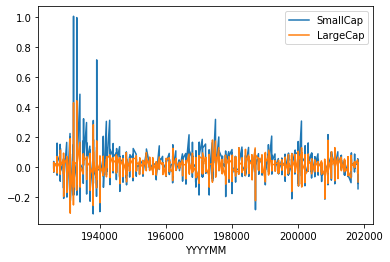

In [41]:
rets.plot()

## Timeseries - forcing the index to be a datetime

We asked Pandas to `parse_dates` in `read_csv()`. Let's check if it was able to do so with the index:

In [42]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', name='YYYYMM', length=1110)

The `dtype` is `int64` which suggests that it was not automatically converted to a date time index, so let's do that now manually. The simplest way to force it to be a timeseries is by reformatting the index data to a `datetime` type as follows:

In [43]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='YYYYMM', length=1110, freq=None)

In [44]:
rets.head()

,SmallCap,LargeCap
YYYYMM,,
1926-07-01,-0.0043,0.0268
1926-08-01,0.0390,0.0209
1926-09-01,-0.0108,0.0016
1926-10-01,-0.0332,-0.0306
1926-11-01,-0.0046,0.0309


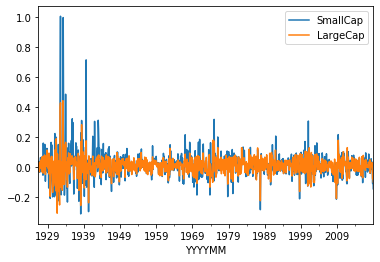

In [45]:
rets.plot()

Now you can see that the index got converted to date format

Now that the DataFrame has a datetime index, we can treat the entire dataframe as a timeseries, which makes things very convenient. For instance, we can extract just the returns in 2008 as follows:

In [46]:
rets["1975"]

,SmallCap,LargeCap
YYYYMM,,
1975-01-01,0.3184,0.1745
1975-02-01,0.0621,0.0541
1975-03-01,0.0942,0.0429
1975-04-01,0.0296,0.0487
1975-05-01,0.0799,0.0575
1975-06-01,0.0768,0.0677
1975-07-01,0.0096,-0.0657
1975-08-01,-0.0537,-0.0247
1975-09-01,-0.0351,-0.0403


This looks good except that we know this is monthly data, and it's showing up with an index that is date stamped. We can fix this using the `to_period` method. We'll see several more examples of Pandas support for timeseries during the course.

In [47]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
YYYYMM,,
1926-07,-0.0043,0.0268
1926-08,0.0390,0.0209
1926-09,-0.0108,0.0016
1926-10,-0.0332,-0.0306
1926-11,-0.0046,0.0309


In [48]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', name='YYYYMM', length=1110, freq='M')

In [49]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [50]:
rets.describe()

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.014958,0.009823
std,0.091210,0.058157
min,-0.309900,-0.305100
25%,-0.025575,-0.019850
50%,0.012650,0.013100
75%,0.047175,0.039600
max,1.003700,0.442400


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

In [56]:
wealth_index = (1+rets["LargeCap"]).cumprod()
wealth_index

YYYYMM
1926-07       1.026800
1926-08       1.048260
1926-09       1.049937
1926-10       1.017809
1926-11       1.049260
              ...     
2018-08    9589.740300
2018-09    9597.412092
2018-10    8865.129550
2018-11    9059.275887
2018-12    8175.090560
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

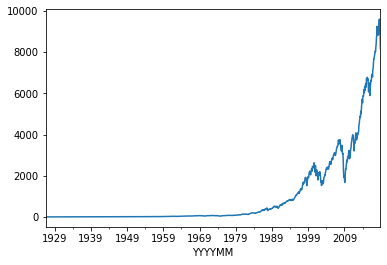

In [57]:
wealth_index.plot()

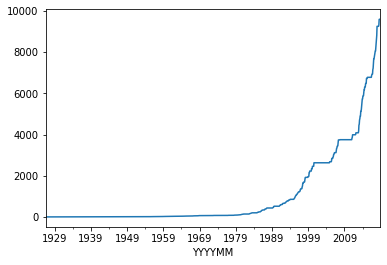

In [58]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

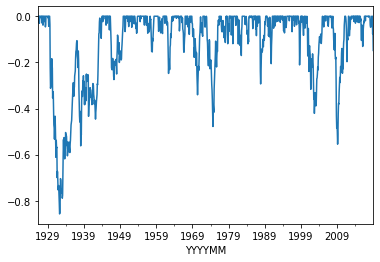

In [59]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

The maximum drawdown

In [60]:
drawdown.min()

-0.8569436338889649

The maximum drawdown since 1975

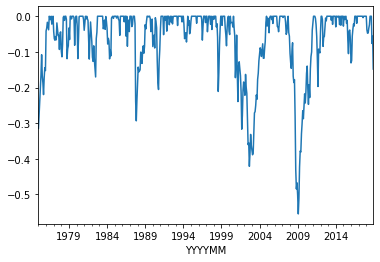

In [61]:
drawdown["1975":].plot()

In [62]:
drawdown["1975":].min()

-0.5545514230708004

# Creating a Drawdown Function

Redoing this analysis for SmallCap or any other stock would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create our first function that will form the first tool in our financial toolkit.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [74]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index   = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns      = (wealth_index - previous_peaks)/previous_peaks
    
    return pd.DataFrame({"Wealth"       : wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown"     : drawdowns})


In [75]:
drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
YYYYMM,,,
1926-07,1026.800000,1026.800000,0.000000
1926-08,1048.260120,1048.260120,0.000000
1926-09,1049.937336,1049.937336,0.000000
1926-10,1017.809254,1049.937336,-0.030600
1926-11,1049.259560,1049.937336,-0.000646


In [76]:
drawdown(rets["SmallCap"]).head()

,Wealth,Previous Peak,Drawdown
YYYYMM,,,
1926-07,995.700000,995.7000,0.000000
1926-08,1034.532300,1034.5323,0.000000
1926-09,1023.359351,1034.5323,-0.010800
1926-10,989.383821,1034.5323,-0.043641
1926-11,984.832655,1034.5323,-0.048041


In [77]:
drawdown(rets["LargeCap"]).min()

Wealth            336.535100
Previous Peak    1026.800000
Drawdown           -0.856944
dtype: float64

In [78]:
drawdown(rets["SmallCap"]).min()

Wealth           284.486085
Previous Peak    995.700000
Drawdown          -0.872141
dtype: float64

In [66]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [70]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [71]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [72]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [73]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].min()

-0.6175975335796284